# **Pembuatan dataset dummy**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random
import os


# Buat folder baru jika belum ada
folder_path = '/content/drive/MyDrive/UAS_Datmin'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' berhasil dibuat.")
else:
    print(f"Folder '{folder_path}' sudah ada.")

# Jumlah mahasiswa yang akan dibuat datanya
n_mahasiswa = 5000

# Fungsi untuk menghasilkan NIM (Nomor Induk Mahasiswa) unik berdasarkan indeks
def generate_nim(index):
    return f"2022{str(index).zfill(4)}"  # Format: 2022 + nomor dengan 4 digit (contoh: 20210001)

# Fungsi untuk menentukan status pekerjaan dan beban kerja mingguan (jam)
def pekerjaan():
    status = random.choice(["Bekerja", "Tidak Bekerja"])  # Pilih status kerja secara acak
    beban = random.randint(10, 40) if status == "Bekerja" else 0  # Beban jam jika bekerja, 0 jika tidak
    return status, beban

# Fungsi untuk menghasilkan IPK tiap semester dengan simulasi fluktuasi
def generate_ipk_semester(rata_ipk_awal, n_semester=6):
    ipk_list = []  # List untuk menyimpan IPK setiap semester
    current_ipk = rata_ipk_awal
    previous_delta = 0  # Untuk menghitung efek rebound fluktuasi IPK

    for i in range(n_semester):
        # Delta perubahan IPK: base normal, dikoreksi dengan efek rebound dan tren acak
        base_delta = np.random.normal(0, 0.15)
        rebound_effect = -0.5 * previous_delta
        trend_correction = np.random.normal(0, 0.05)
        delta = base_delta + rebound_effect + trend_correction

        new_ipk = current_ipk + delta
        new_ipk = np.clip(new_ipk, 2.0, 4.0)  # Batasi IPK antara 2.0 sampai 4.0

        # Batasi perubahan IPK antar semester maksimal 0.6
        if i > 0 and abs(new_ipk - ipk_list[-1]) > 0.6:
            new_ipk = ipk_list[-1] + np.sign(new_ipk - ipk_list[-1]) * 0.6

        new_ipk = round(new_ipk, 2)  # Bulatkan ke dua desimal
        ipk_list.append(new_ipk)
        current_ipk = new_ipk
        previous_delta = delta  # Simpan delta untuk semester selanjutnya

    return ipk_list

# List untuk menyimpan seluruh data mahasiswa
data = []

# Looping untuk membuat data tiap mahasiswa
for i in range(n_mahasiswa):
    nim = generate_nim(i)  # Buat NIM unik

    # Jumlah pengulangan mata kuliah (maks 4), menggunakan distribusi Poisson
    jumlah_pengulangan = min(np.random.poisson(1.2), 4)

    # Tentukan rata-rata IPK awal dengan probabilitas 70% di rentang 3.0-3.5 dan sisanya 2.0-2.8
    if random.random() < 0.7:
        rata_ipk = np.random.uniform(3.0, 3.5)
    else:
        rata_ipk = np.random.uniform(2.0, 2.8)

    # Penalti rata-rata IPK jika ada pengulangan > 2
    rata_ipk -= 0.1 * max(0, jumlah_pengulangan - 2)
    rata_ipk = np.clip(rata_ipk, 2.0, 4.0)

    # Generate IPK tiap semester
    ipk_semester = generate_ipk_semester(rata_ipk, 6)
    ipk_rata2 = np.mean(ipk_semester)  # IPK rata-rata selama 6 semester

    # Generate data kehadiran dengan distribusi normal dibatasi 70-100%
    kehadiran = round(np.clip(np.random.normal(loc=85, scale=7), 70, 100), 2)

    # Aktivitas pembelajaran daring dengan distribusi normal dibatasi 0-100
    aktivitas_online_score = round(np.clip(np.random.normal(loc=60, scale=20), 0, 100), 2)
    aktivitas_online = aktivitas_online_score

    # Status pekerjaan dan beban kerja
    status_kerja, beban_kerja = pekerjaan()

    # Hitung skor risiko DO berdasarkan berbagai faktor
    skor_risiko = 0
    if ipk_rata2 < 2.5:
        skor_risiko += 2
    if kehadiran < 75:
        skor_risiko += 2
    if jumlah_pengulangan > 2:
        skor_risiko += 2
    if status_kerja == "Bekerja" and beban_kerja > 30:
        skor_risiko += 1
    if ipk_semester[-1] < ipk_semester[0] - 0.5:
        skor_risiko += 1
    if aktivitas_online < 40:
        skor_risiko += 1

    # Klasifikasi risiko DO berdasarkan skor (>=4 artinya Risiko Tinggi)
    risiko = "Risiko Tinggi" if skor_risiko >= 4 else "Aman"

    # Tambahkan data mahasiswa ke list data
    data.append([
        nim,
        *ipk_semester,
        kehadiran,
        jumlah_pengulangan,
        aktivitas_online,
        status_kerja,
        beban_kerja,
        risiko
    ])

# Definisikan nama kolom untuk dataframe
columns = [
    "NIM",
    "IPK_Semester_1", "IPK_Semester_2", "IPK_Semester_3",
    "IPK_Semester_4", "IPK_Semester_5", "IPK_Semester_6",
    "Kehadiran_Per_Mata_Kuliah",
    "Riwayat_Pengambilan_Ulang",
    "Aktivitas_Sistem_Pembelajaran_Daring",
    "Status_Pekerjaan",
    "Beban_Kerja_JamPerMinggu",
    "Status_Risiko_DO"
]

# Buat DataFrame dari data yang sudah dikumpulkan
df = pd.DataFrame(data, columns=columns)

# Tampilkan info sukses dan preview data
print("Dataset berhasil dibuat dengan jumlah baris:", len(df))
display(df.head())

# Simpan file CSV ke folder baru tersebut
file_path = os.path.join(folder_path, 'dataset_mahasiswa_prediksi_DO.csv')
df.to_csv(file_path, index=False)
print(f"Dataset berhasil disimpan ke {file_path}")


Folder '/content/drive/MyDrive/UAS_Datmin' berhasil dibuat.
Dataset berhasil dibuat dengan jumlah baris: 5000


,NIM,IPK_Semester_1,IPK_Semester_2,IPK_Semester_3,IPK_Semester_4,IPK_Semester_5,IPK_Semester_6,Kehadiran_Per_Mata_Kuliah,Riwayat_Pengambilan_Ulang,Aktivitas_Sistem_Pembelajaran_Daring,Status_Pekerjaan,Beban_Kerja_JamPerMinggu,Status_Risiko_DO
0,20220000,2.44,2.59,2.65,2.54,2.44,2.59,75.20,3,61.10,Tidak Bekerja,0,Aman
1,20220001,3.15,3.44,3.67,3.23,3.68,3.69,89.37,0,60.13,Bekerja,35,Aman
2,20220002,3.27,3.14,3.04,3.41,2.93,2.79,86.03,0,44.98,Tidak Bekerja,0,Aman
3,20220003,3.68,3.55,3.62,3.49,3.79,3.47,79.62,2,76.06,Tidak Bekerja,0,Aman
4,20220004,2.98,3.19,2.89,2.86,2.93,2.83,90.50,2,75.29,Tidak Bekerja,0,Aman


Dataset berhasil disimpan ke /content/drive/MyDrive/UAS_Datmin/dataset_mahasiswa_prediksi_DO.csv


# **Pemilihan Metode Data Mining**
**Random Forest**

karena metode ini memiliki beberapa keunggulan kunci yang sangat sesuai untuk kasus prediksi risiko DO ini:

1. Akurasi Tinggi: Random Forest adalah model ensemble yang menggabungkan prediksi dari banyak decision tree. Pendekatan ini menghasilkan prediksi yang lebih akurat dan stabil daripada menggunakan satu pohon keputusan tunggal, sehingga mengurangi kemungkinan salah klasifikasi.

2. Ketahanan Terhadap Overfitting: Salah satu risiko terbesar dalam pemodelan adalah overfitting, di mana model terlalu "menghafal" data latih dan tidak bekerja dengan baik pada data baru. Random Forest secara inheren mengurangi risiko ini dengan membangun setiap pohon dari sampel data dan fitur yang acak. Proses tuning dengan GridSearchCV yang ada di kode Anda semakin memperkuat kemampuan ini.

3. Kemampuan Mengidentifikasi Faktor Penting (Feature Importance): Random Forest dapat memberikan peringkat fitur mana yang paling berpengaruh dalam memprediksi risiko DO. Ini sangat berharga bagi pihak universitas karena tidak hanya memberi tahu siapa mahasiswa yang berisiko, tetapi juga mengapa (misalnya, karena IPK semester terakhir yang anjlok atau beban kerja yang terlalu berat).

4. Fleksibilitas: Metode ini mampu menangani berbagai jenis data (baik numerik seperti IPK maupun kategorikal seperti Status Pekerjaan yang sudah di-encode) dan dapat menangkap hubungan yang kompleks dan non-linear antar fitur tanpa memerlukan persiapan data yang rumit.

# **Metode Crisp DM**

# Business Understanding ( Pemahaman Bisnis )

- Tujuan: Tujuan utamanya adalah membangun sistem peringatan dini (early warning system) untuk mengidentifikasi mahasiswa yang memiliki risiko tinggi untuk drop out (DO).

- Manfaat: Dengan identifikasi dini, pihak universitas (dosen wali, dekanat, rektorat) dapat memberikan intervensi yang tepat sasaran, seperti konseling akademik, bantuan keuangan, atau penyesuaian beban studi, untuk mencegah terjadinya DO.

- Kriteria Sukses: Sistem dianggap berhasil jika mampu memprediksi dengan recall yang tinggi untuk kelas "Risiko Tinggi". Artinya, sistem harus mampu menjaring sebanyak mungkin mahasiswa yang benar-benar berisiko, bahkan jika ada beberapa prediksi yang kurang tepat (lebih baik salah mendeteksi mahasiswa aman sebagai berisiko daripada melewatkan mahasiswa yang benar-benar berisiko).

# Data Understanding (Pemahaman Data)

- Pengumpulan Data: Pada kasus ini, data dibuat secara sintetis (dataset dummy) yang merepresentasikan data riil mahasiswa sebanyak 5000 record.
Analisis Data Eksploratif (EDA): Kode Anda melakukan tahap ini dengan sangat baik melalui visualisasi:

- Distribusi IPK: Plot histogram menunjukkan sebaran IPK setiap semester. Terlihat bahwa mayoritas IPK terpusat di sekitar 3.0 - 3.5, sesuai dengan logika pembuatan data.

- Distribusi Fitur Lain: Analisis terhadap kehadiran, aktivitas daring, dan riwayat pengulangan mata kuliah memberikan gambaran umum tentang profil akademik mahasiswa.

- Distribusi Target: Plot Status_Risiko_DO menunjukkan adanya ketidakseimbangan kelas (imbalance data), di mana jumlah mahasiswa "Aman" jauh lebih banyak daripada "Risiko Tinggi". Ini adalah temuan krusial yang harus ditangani di tahap selanjutnya.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load dataset (jika belum ada di variabel df)
file_path = '/content/drive/MyDrive/UAS_Datmin/dataset_mahasiswa_prediksi_DO.csv'
df = pd.read_csv(file_path)

print("Dataset berhasil dimuat.")


Dataset berhasil dimuat.


In [ ]:
print("Informasi Umum Dataset:")
print(df.info())

print("\nStatistik Deskriptif:")
display(df.describe())


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NIM                                   5000 non-null   int64  
 1   IPK_Semester_1                        5000 non-null   float64
 2   IPK_Semester_2                        5000 non-null   float64
 3   IPK_Semester_3                        5000 non-null   float64
 4   IPK_Semester_4                        5000 non-null   float64
 5   IPK_Semester_5                        5000 non-null   float64
 6   IPK_Semester_6                        5000 non-null   float64
 7   Kehadiran_Per_Mata_Kuliah             5000 non-null   float64
 8   Riwayat_Pengambilan_Ulang             5000 non-null   int64  
 9   Aktivitas_Sistem_Pembelajaran_Daring  5000 non-null   float64
 10  Status_Pekerjaan                      5000 non-null   object

,NIM,IPK_Semester_1,IPK_Semester_2,IPK_Semester_3,IPK_Semester_4,IPK_Semester_5,IPK_Semester_6,Kehadiran_Per_Mata_Kuliah,Riwayat_Pengambilan_Ulang,Aktivitas_Sistem_Pembelajaran_Daring,Beban_Kerja_JamPerMinggu
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2.022250e+07,2.979732,2.984514,2.983746,2.984614,2.991976,2.993478,85.031868,1.164800,60.25676,12.396200
std,1.443520e+03,0.446632,0.451507,0.462387,0.468470,0.473891,0.478477,6.796203,1.055776,19.68979,14.014154
min,2.022000e+07,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,70.000000,0.000000,0.00000,0.000000
25%,2.022125e+07,2.660000,2.650000,2.650000,2.640000,2.630000,2.640000,80.330000,0.000000,47.05000,0.000000
50%,2.022250e+07,3.110000,3.100000,3.080000,3.080000,3.080000,3.070000,85.080000,1.000000,60.66000,0.000000
75%,2.022375e+07,3.310000,3.320000,3.330000,3.330000,3.350000,3.360000,89.660000,2.000000,73.86500,25.000000
max,2.022500e+07,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,100.000000,4.000000,100.00000,40.000000


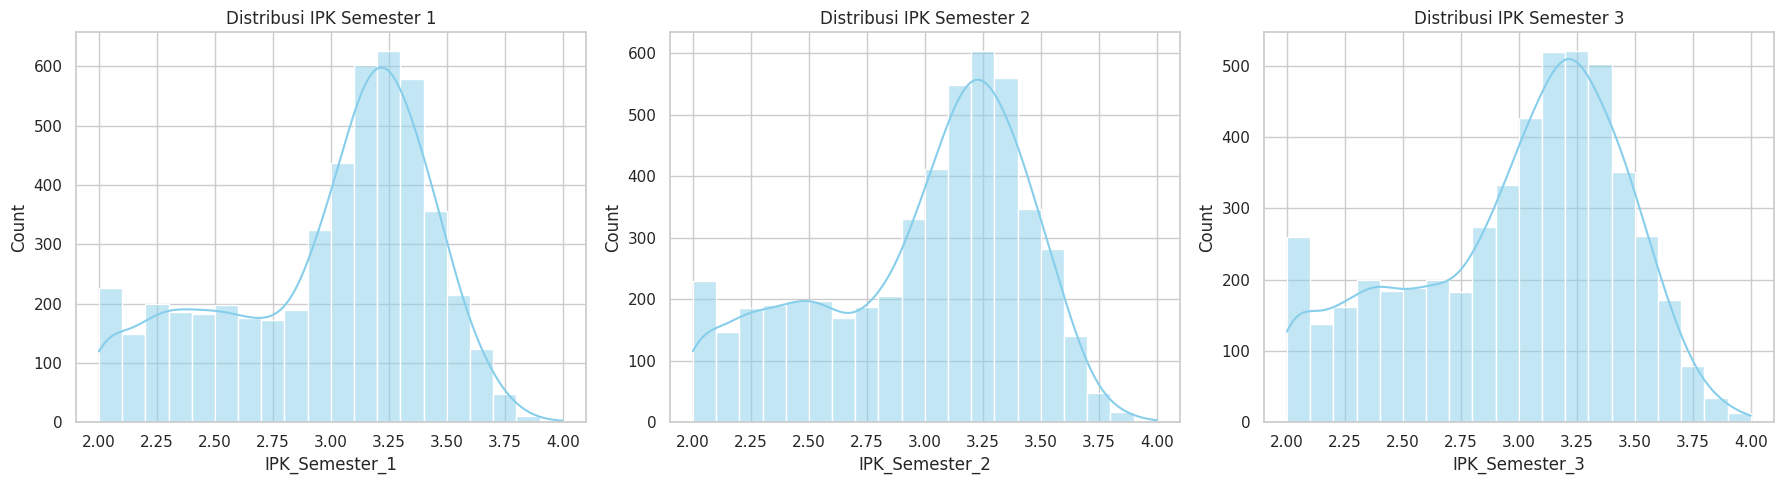

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i in range(3):
    sns.histplot(df[f"IPK_Semester_{i+1}"], bins=20, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f'Distribusi IPK Semester {i+1}')
plt.tight_layout()
plt.show()


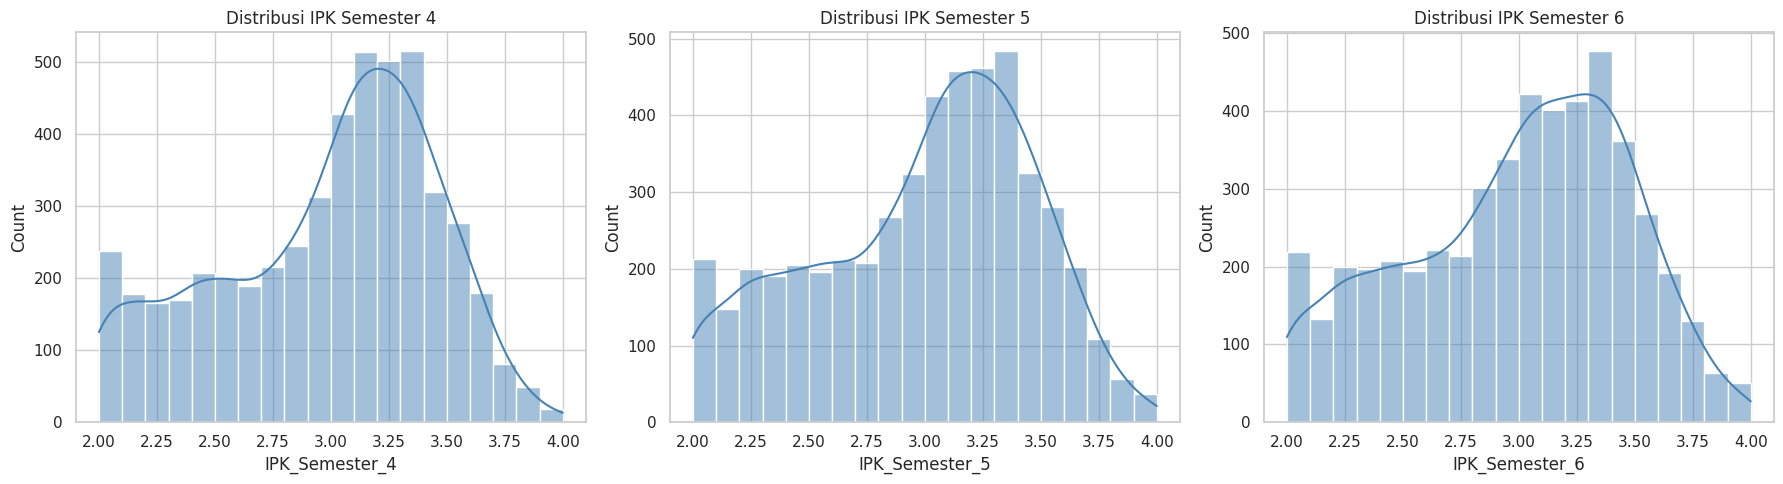

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i in range(3, 6):
    sns.histplot(df[f"IPK_Semester_{i+1}"], bins=20, kde=True, ax=axes[i-3], color="steelblue")
    axes[i-3].set_title(f'Distribusi IPK Semester {i+1}')
plt.tight_layout()
plt.show()


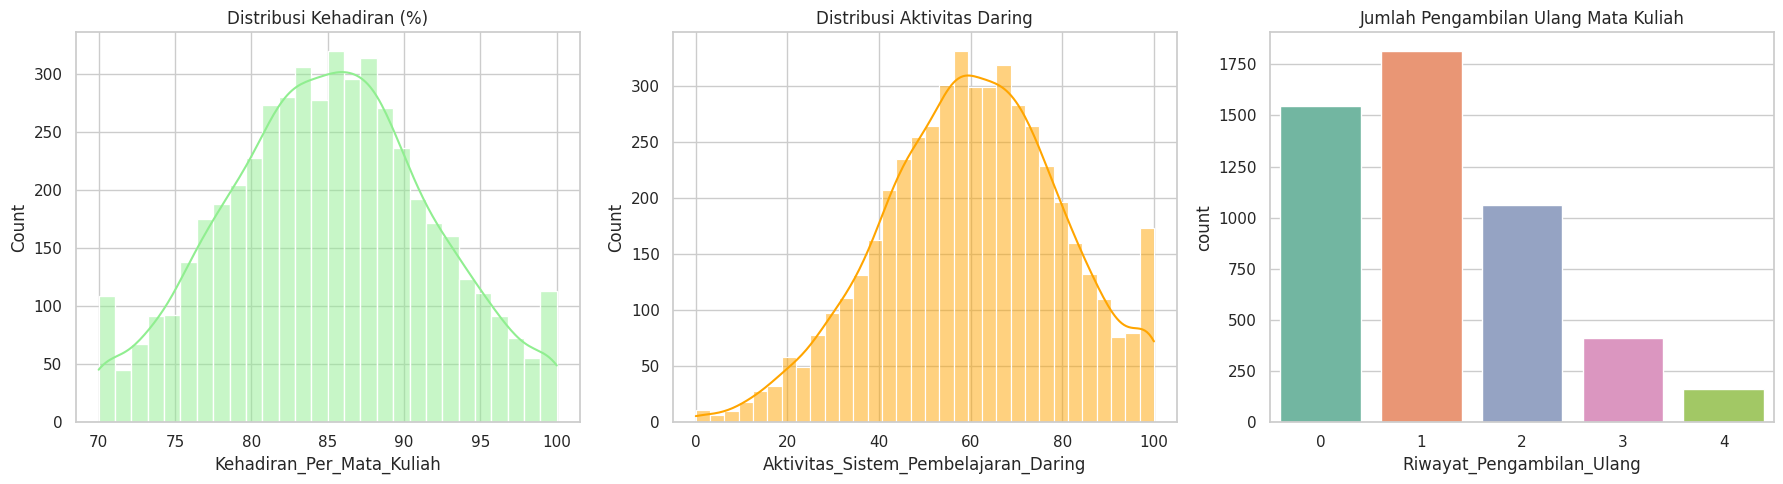

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Kehadiran_Per_Mata_Kuliah"], kde=True, ax=axes[0], color="lightgreen")
axes[0].set_title("Distribusi Kehadiran (%)")

sns.histplot(df["Aktivitas_Sistem_Pembelajaran_Daring"], kde=True, ax=axes[1], color="orange")
axes[1].set_title("Distribusi Aktivitas Daring")

sns.countplot(
    x="Riwayat_Pengambilan_Ulang",
    hue="Riwayat_Pengambilan_Ulang",
    data=df,
    ax=axes[2],
    palette="Set2",
    legend=False
)

axes[2].set_title("Jumlah Pengambilan Ulang Mata Kuliah")

plt.tight_layout()
plt.show()


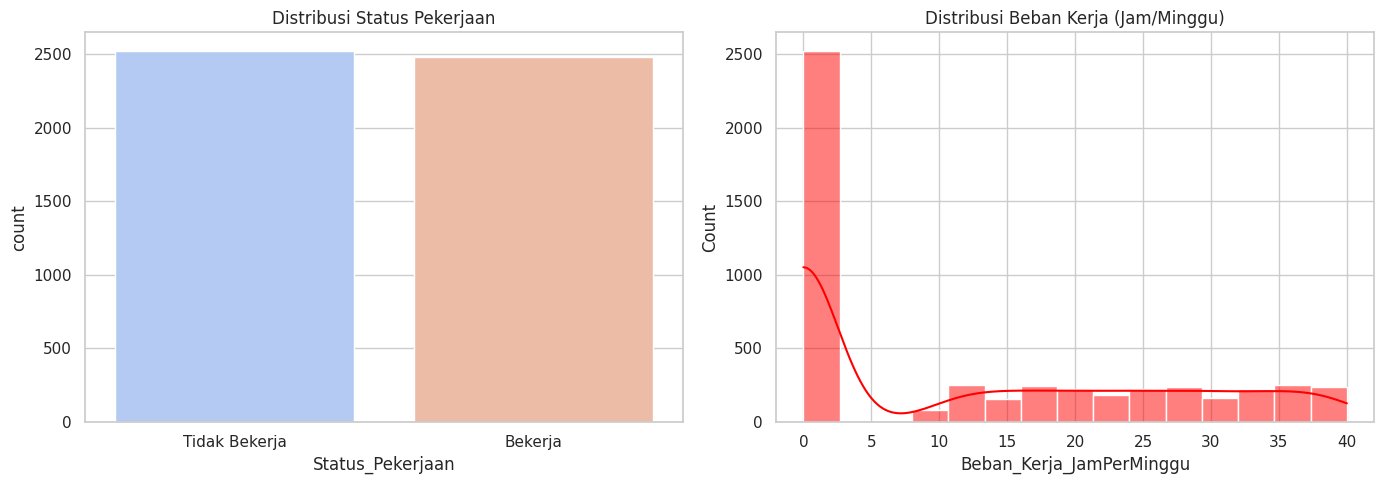

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(
    x="Status_Pekerjaan",
    hue="Status_Pekerjaan",  # tambahkan hue sama dengan x
    data=df,
    ax=axes[0],
    palette="coolwarm",
    legend=False  # supaya legend tidak muncul dua kali
)

axes[0].set_title("Distribusi Status Pekerjaan")

sns.histplot(df["Beban_Kerja_JamPerMinggu"], bins=15, ax=axes[1], kde=True, color="red")
axes[1].set_title("Distribusi Beban Kerja (Jam/Minggu)")

plt.tight_layout()
plt.show()


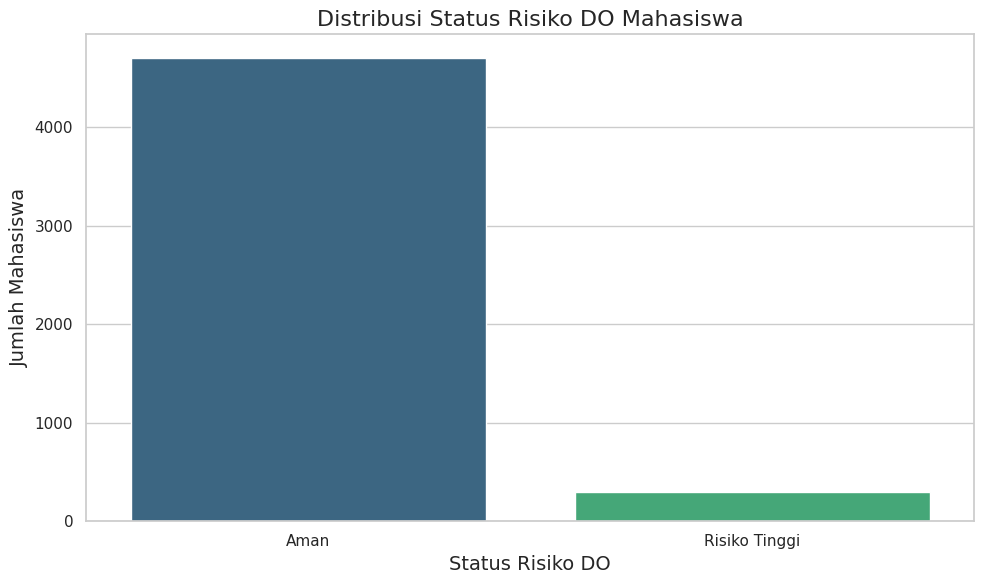

In [ ]:
# Visualisasi distribusi Status_Risiko_DO tanpa warning
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Status_Risiko_DO', hue='Status_Risiko_DO', palette='viridis', legend=False)

plt.title('Distribusi Status Risiko DO Mahasiswa', fontsize=16)
plt.xlabel('Status Risiko DO', fontsize=14)
plt.ylabel('Jumlah Mahasiswa', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Data Preparation (Preprocessing)

1. Pembersihan Data:
- Penanganan Duplikat: Menghapus data duplikat berdasarkan NIM untuk memastikan setiap mahasiswa terhitung satu kali.
- Penanganan Missing Values: Kode Anda mengecek adanya nilai yang hilang (isnull().sum()). Meskipun pada data dummy ini tidak ada, dalam skenario nyata, nilai yang hilang akan diisi (misalnya, dengan mean atau median untuk data numerik).

2. Transformasi Data (Encoding):
- Label Encoding: Kolom Status_Risiko_DO dan Status_Pekerjaan diubah dari teks menjadi angka (0 dan 1). Ini wajib karena model matematis tidak bisa memproses data teks.
- Status_Risiko_DO: Aman -> 0, Risiko Tinggi -> 1
- Status_Pekerjaan: Bekerja -> 0, Tidak Bekerja -> 1

3. Penanganan Ketidakseimbangan Kelas:
- SMOTE (Synthetic Minority Over-sampling Technique): Karena kelas "Risiko Tinggi" jumlahnya sangat sedikit, teknik SMOTE digunakan pada data latih. SMOTE membuat "sampel sintetis" baru dari kelas minoritas, sehingga model dapat belajar mengenali pola kelas "Risiko Tinggi" dengan lebih baik dan tidak menjadi bias.

4. Feature Scaling:
- StandardScaler: Semua fitur numerik diskalakan agar memiliki rata-rata 0 dan standar deviasi 1. Ini memastikan tidak ada fitur yang mendominasi proses pembelajaran hanya karena rentang nilainya lebih besar (misalnya, Beban_Kerja_JamPerMinggu vs. IPK).

# Mengecek apakah ada data duplikat dan menghapusnya

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
file_path = '/content/drive/MyDrive/UAS_Datmin/dataset_mahasiswa_prediksi_DO.csv'
df = pd.read_csv(file_path)

# Hapus duplikat berdasarkan NIM
df = df.drop_duplicates(subset="NIM")
print(f"Jumlah data setelah hapus duplikat: {df.shape[0]}")


Jumlah data setelah hapus duplikat: 5000


# Cek apakah ada missing value
(jika ada maka melakukan fungsi yang ada didalam cell untuk mengisi missing value dengan median/mean)

In [ ]:
# Cek missing values
print("Jumlah missing value per kolom:\n", df.isnull().sum())

# Tangani missing value
# a. Untuk numerik → isi dengan median
# num_cols = df.select_dtypes(include=np.number).columns.tolist()
# df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# b. Untuk kategorikal → isi dengan modus
# cat_cols = df.select_dtypes(include='object').columns.tolist()
# df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


Jumlah missing value per kolom:
 NIM                                     0
IPK_Semester_1                          0
IPK_Semester_2                          0
IPK_Semester_3                          0
IPK_Semester_4                          0
IPK_Semester_5                          0
IPK_Semester_6                          0
Kehadiran_Per_Mata_Kuliah               0
Riwayat_Pengambilan_Ulang               0
Aktivitas_Sistem_Pembelajaran_Daring    0
Status_Pekerjaan                        0
Beban_Kerja_JamPerMinggu                0
Status_Risiko_DO                        0
dtype: int64


# One hot encoding data kategori (bukan numerik)

Status_resiko_do_label

0 = aman
1 = risiko tinggi

Status_pekerjaan

0 = bekerja
1 = tidak bekerja

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target label: Status_Risiko_DO
le_risiko = LabelEncoder()
df['Status_Risiko_DO_Label'] = le_risiko.fit_transform(df['Status_Risiko_DO'])  # Aman=0, Risiko Tinggi=1

# Encode Status_Pekerjaan ke kolom baru
le_pekerjaan = LabelEncoder()
df['Status_Pekerjaan_Label'] = le_pekerjaan.fit_transform(df['Status_Pekerjaan'])

# Hapus kolom aslinya (yang sudah digantikan)
df.drop(columns=['Status_Risiko_DO', 'Status_Pekerjaan'], inplace=True)

# One-hot encode kolom kategorik lainnya (selain yang sudah di-handle)
categorical_cols = df.select_dtypes(include='object').columns  # cari sisa kolom kategorik
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Tampilkan beberapa baris pertama dari dataframe hasil preprocessing
df.head()


,NIM,IPK_Semester_1,IPK_Semester_2,IPK_Semester_3,IPK_Semester_4,IPK_Semester_5,IPK_Semester_6,Kehadiran_Per_Mata_Kuliah,Riwayat_Pengambilan_Ulang,Aktivitas_Sistem_Pembelajaran_Daring,Beban_Kerja_JamPerMinggu,Status_Risiko_DO_Label,Status_Pekerjaan_Label
0,20220000,2.44,2.59,2.65,2.54,2.44,2.59,75.20,3,61.10,0,0,1
1,20220001,3.15,3.44,3.67,3.23,3.68,3.69,89.37,0,60.13,35,0,0
2,20220002,3.27,3.14,3.04,3.41,2.93,2.79,86.03,0,44.98,0,0,1
3,20220003,3.68,3.55,3.62,3.49,3.79,3.47,79.62,2,76.06,0,0,1
4,20220004,2.98,3.19,2.89,2.86,2.93,2.83,90.50,2,75.29,0,0,1


# Menyimpan dataset clean

In [ ]:
# 6. Cek target label
if 'Status_Risiko_DO_Label' not in df.columns:
    raise ValueError("Kolom target 'Status_Risiko_DO_Label' tidak ditemukan!")

# 7. Simpan data hasil preprocessing
df.to_csv('/content/drive/MyDrive/UAS_Datmin/Clean_dataset_mahasiswa_preprocessed.csv', index=False)

print("\n✅ Preprocessing selesai. Data disimpan sebagai 'Clean_dataset_mahasiswa_preprocessed.csv'")
df.head()


✅ Preprocessing selesai. Data disimpan sebagai 'Clean_dataset_mahasiswa_preprocessed.csv'


,NIM,IPK_Semester_1,IPK_Semester_2,IPK_Semester_3,IPK_Semester_4,IPK_Semester_5,IPK_Semester_6,Kehadiran_Per_Mata_Kuliah,Riwayat_Pengambilan_Ulang,Aktivitas_Sistem_Pembelajaran_Daring,Beban_Kerja_JamPerMinggu,Status_Risiko_DO_Label,Status_Pekerjaan_Label
0,20220000,2.44,2.59,2.65,2.54,2.44,2.59,75.20,3,61.10,0,0,1
1,20220001,3.15,3.44,3.67,3.23,3.68,3.69,89.37,0,60.13,35,0,0
2,20220002,3.27,3.14,3.04,3.41,2.93,2.79,86.03,0,44.98,0,0,1
3,20220003,3.68,3.55,3.62,3.49,3.79,3.47,79.62,2,76.06,0,0,1
4,20220004,2.98,3.19,2.89,2.86,2.93,2.83,90.50,2,75.29,0,0,1


# Melihat data distribusi label

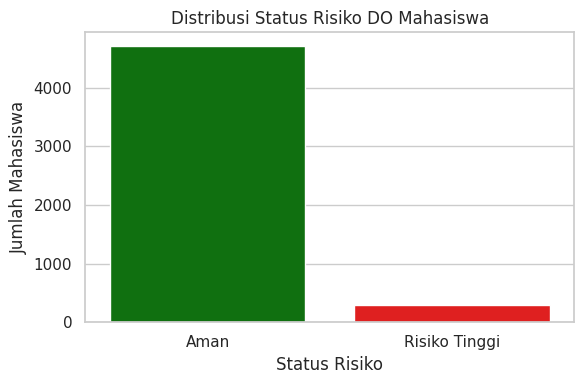

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map label
label_map = {0: 'Aman', 1: 'Risiko Tinggi'}
df['Label_Keterangan'] = df['Status_Risiko_DO_Label'].map(label_map)

# Plot dengan hue dan legend=False untuk menghindari warning
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Label_Keterangan', hue='Label_Keterangan',
              palette={'Aman': 'green', 'Risiko Tinggi': 'red'}, legend=False)

plt.title('Distribusi Status Risiko DO Mahasiswa')
plt.xlabel('Status Risiko')
plt.ylabel('Jumlah Mahasiswa')
plt.tight_layout()
plt.show()


# Melihat data yang memiliki label (0 dan 1)

In [ ]:
df[df['Status_Risiko_DO_Label'] == 0].head(5)

,NIM,IPK_Semester_1,IPK_Semester_2,IPK_Semester_3,IPK_Semester_4,IPK_Semester_5,IPK_Semester_6,Kehadiran_Per_Mata_Kuliah,Riwayat_Pengambilan_Ulang,Aktivitas_Sistem_Pembelajaran_Daring,Beban_Kerja_JamPerMinggu,Status_Risiko_DO_Label,Status_Pekerjaan_Label,Label_Keterangan
0,20220000,2.44,2.59,2.65,2.54,2.44,2.59,75.20,3,61.10,0,0,1,Aman
1,20220001,3.15,3.44,3.67,3.23,3.68,3.69,89.37,0,60.13,35,0,0,Aman
2,20220002,3.27,3.14,3.04,3.41,2.93,2.79,86.03,0,44.98,0,0,1,Aman
3,20220003,3.68,3.55,3.62,3.49,3.79,3.47,79.62,2,76.06,0,0,1,Aman
4,20220004,2.98,3.19,2.89,2.86,2.93,2.83,90.50,2,75.29,0,0,1,Aman


In [ ]:
df[df['Status_Risiko_DO_Label'] == 1].head(5)

,NIM,IPK_Semester_1,IPK_Semester_2,IPK_Semester_3,IPK_Semester_4,IPK_Semester_5,IPK_Semester_6,Kehadiran_Per_Mata_Kuliah,Riwayat_Pengambilan_Ulang,Aktivitas_Sistem_Pembelajaran_Daring,Beban_Kerja_JamPerMinggu,Status_Risiko_DO_Label,Status_Pekerjaan_Label,Label_Keterangan
6,20220006,2.93,2.78,2.91,2.88,3.10,2.72,70.00,4,76.11,0,1,1,Risiko Tinggi
11,20220011,2.42,2.21,2.23,2.21,2.28,2.51,73.59,1,44.05,24,1,0,Risiko Tinggi
82,20220082,3.11,2.79,3.21,2.85,3.13,3.09,71.95,3,67.62,0,1,1,Risiko Tinggi
98,20220098,2.00,2.12,2.28,2.10,2.35,2.00,81.31,3,45.18,29,1,0,Risiko Tinggi
99,20220099,2.82,2.76,3.00,2.83,2.90,2.81,73.08,3,100.00,19,1,0,Risiko Tinggi


#**Modeling**

1. Pembagian Data: Data dibagi menjadi 80% data latih (training) dan 20% data uji (testing) menggunakan train_test_split. Parameter stratify=y digunakan untuk memastikan proporsi kelas "Aman" dan "Risiko Tinggi" sama di kedua set data.

2. Pencarian Hiperparameter: GridSearchCV digunakan untuk secara sistematis menguji berbagai kombinasi parameter Random Forest (seperti n_estimators, max_depth, dll.) dan menemukan kombinasi terbaik berdasarkan skor akurasi cross-validation. Ini adalah praktik terbaik untuk mendapatkan model yang optimal.

3. Pelatihan Model: Model Random Forest terbaik (best_model) dilatih menggunakan data latih yang sudah bersih, seimbang, dan terskala (X_train_bal, y_train_bal).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter

# Load data hasil preprocessing (tanpa balancing dulu)
df = pd.read_csv('/content/drive/MyDrive/UAS_Datmin/Clean_dataset_mahasiswa_preprocessed.csv')

# Pisahkan fitur dan target
X = df.drop(columns=['Status_Risiko_DO_Label', 'NIM'])
y = df['Status_Risiko_DO_Label']

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancing data dengan SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Distribusi setelah SMOTE balancing:")
print(Counter(y_train_bal))

# Setup RandomForest dengan parameter default dulu
rf = RandomForestClassifier(random_state=42)

# Grid parameter untuk tuning agar menghindari overfitting
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 7, 10],            # Batasi kedalaman pohon
    'min_samples_split': [5, 10],       # Minimal samples untuk split
    'min_samples_leaf': [3, 5, 10],     # Minimal samples di daun
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],                 # Gunakan bootstrap sampling
}

# GridSearch dengan 5-fold cross-validation untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_bal, y_train_bal)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Pakai model terbaik dari grid search
best_model = grid_search.best_estimator_

Distribusi setelah SMOTE balancing:
Counter({0: 3766, 1: 3766})
Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
import joblib

# Simpan model terbaik dan scaler ke file
joblib.dump(best_model, 'rf_model_best.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# **Evaluasi Model**

In [ ]:
# Evaluasi
y_pred = best_model.predict(X_test_scaled)

print("\nAccuracy (test):", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy (test): 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       943
           1       0.89      0.95      0.92        57

    accuracy                           0.99      1000
   macro avg       0.94      0.97      0.95      1000
weighted avg       0.99      0.99      0.99      1000


Confusion Matrix:
[[936   7]
 [  3  54]]


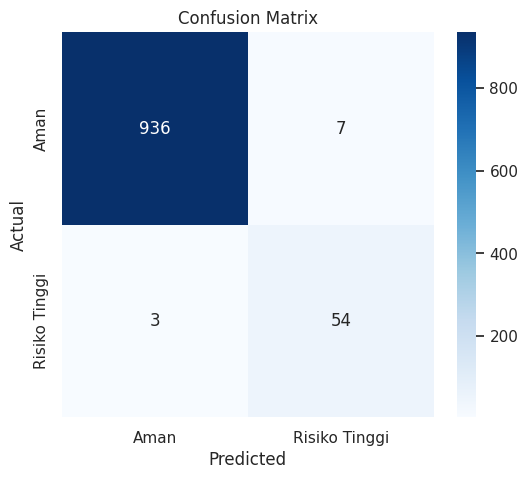

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Aman','Risiko Tinggi'],
            yticklabels=['Aman','Risiko Tinggi'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Interpretasi Confusion Matrix sederhana
tn, fp, fn, tp = cm.ravel()
print(f"""
Interpretasi Confusion Matrix:
- True Negative (Aman terdeteksi aman): {tn}
- False Positive (Aman terdeteksi risiko): {fp}
- False Negative (Risiko terdeteksi aman): {fn}
- True Positive (Risiko terdeteksi risiko): {tp}
""")



Interpretasi Confusion Matrix:
- True Negative (Aman terdeteksi aman): 936
- False Positive (Aman terdeteksi risiko): 7
- False Negative (Risiko terdeteksi aman): 3
- True Positive (Risiko terdeteksi risiko): 54



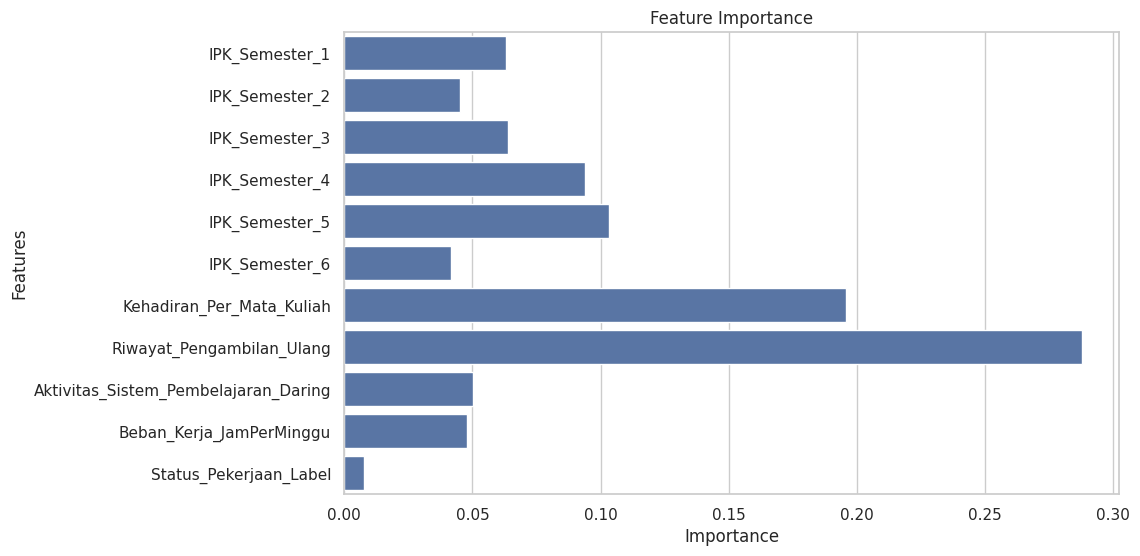

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
importances = model.feature_importances_
feat_names = X.columns
sns.barplot(x=importances, y=feat_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



ROC AUC Score: 0.9987


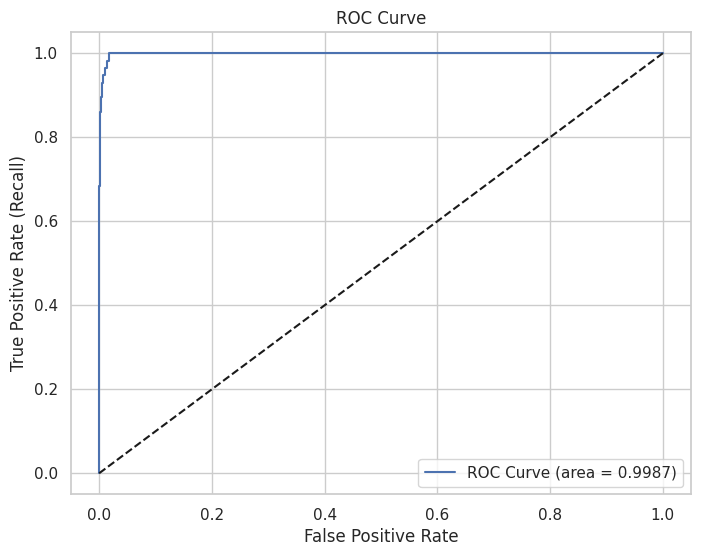

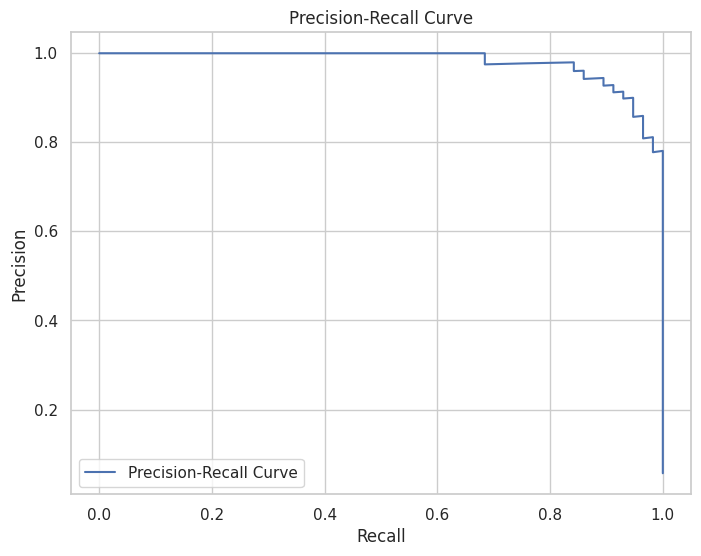

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# ROC AUC Score (bila probabilitas bisa didapat)
if hasattr(best_model, "predict_proba"):
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"\nROC AUC Score: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {auc:.4f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Plot Precision-Recall Curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(8,6))
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
else:
    print("\nModel tidak memiliki metode predict_proba, ROC dan PR curve tidak dapat dibuat.")


Cross-Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train_bal, y_train_bal, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validation accuracy scores: [0.99403579 0.99536117 0.99403579 0.99867462 0.9933687 ]
Mean CV accuracy: 0.9951 ± 0.0019


Metrik khusus imbalance data
Balanced Accuracy:

memperhitungkan ketidakseimbangan kelas.

In [ ]:
from sklearn.metrics import balanced_accuracy_score

bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {bal_acc:.4f}")

Balanced Accuracy: 0.9700


Matthews Correlation Coefficient (MCC)

In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")


Matthews Correlation Coefficient: 0.9105


# **Deployment**

- Penyimpanan Model: Model terbaik (best_model) dan scaler (scaler.pkl) disimpan menggunakan joblib. Ini memungkinkan model untuk dimuat dan digunakan kembali di masa depan untuk memprediksi data baru tanpa perlu melatih ulang dari awal.